# TP 8
## Partie 1 : Integration Stochastique

In [1]:
import numpy as np
import matplotlib . pyplot as plt

On represente 1000 point aléatoire dans le carée [0, 1]x[0, 1], et le quart de cercle de rayon 1.

### Calcul de pi

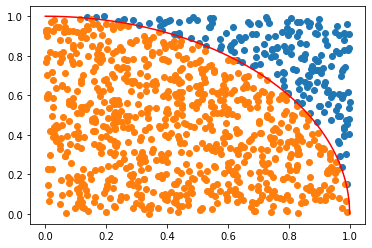

In [2]:
#on genere des coordonée
coo = np.random.uniform(0, 1, size=(1000, 2))
coo_in_R = np.array([[x, y] for [x, y] in coo if x**2 + y**2 < 1])
coo_out_R = np.array([[x, y] for [x, y] in coo if x**2 + y**2 >= 1])

#on cree la courbe du cercle
X = np.linspace(0, 1, 1000)
Y = np.sqrt(1 - X*X)

#on graph
plt.scatter(coo_out_R[:, 0], coo_out_R[:, 1])
plt.scatter(coo_in_R[:, 0], coo_in_R[:, 1])
plt.plot(X, Y, 'r')
plt.show()

L'air du carre est 1 alors que l'air du quart de cercle est $ \frac{\pi}{4} $, on a donc $\pi = \frac{4N_{in}}{N} $

In [3]:
def pi_estimate(N_sample):
    #rayon du cercle
    R = 1
    
    #on genere les coordonée
    coo = np.random.uniform(0, R, size=(N_sample, 2))
    
    N_in = 0
    for (x, y) in coo:
        #on compte les coordonée dans le disc de rayon 1
        if x*x + y*y < R:
                N_in += 1
                
    return 4*N_in / N_sample

print("estimation de pi: ", pi_estimate(100000))

estimation de pi:  3.13936


On optient bien une estimation de pi.

On peut comparer ce code "naif" avec une version utilsant numpy:

In [4]:
def direct_sample_pi_fast (Nt) :
    xran = np. random . uniform ( -1 , 1 , Nt) # generates directly an array of Nt floats uniformly distributed in [ -1 , 1]
    yran = np. random . uniform ( -1 , 1 , Nt) # same as above
    return (( np. square ( xran ) +np. square ( yran ) ) <1.0) .sum ()

%timeit -r3 -n5 direct_sample_pi_fast(1000)
%timeit -r3 -n5 pi_estimate(1000)

The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
70.4 µs ± 43.9 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
2.57 ms ± 549 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


On vois que la version naive est 30 fois plus lente.

### Intégrale de Gauss

#### Échantillonnage Uniforme

On peut calculer l'integrale In avec une suite de point alleatoire:

In [5]:
def integrate_random(func, x_min, x_max, n_point):
    Xrand = np.random.uniform(x_min, x_max, n_point)
    Y = func(Xrand)
    return Y.sum()*(x_max - x_min)/n_point

def gauss_estimate(x_max, n_point):
    def f(x):
        return np.exp(-x**2)
    
    return integrate_random(f, 0, x_max, n_point)

On peut choisir une borne max par rapport à l'ereur maximum que l'on admet et le nombre de point que l'on est pret a mettre.

Le poid des grand x est tres faible car $ e^{-x^2} $ decroit tres vite. Augmenter trop fortement la borne superieur reduiras inutilement la densité d'echantillons dans la partie pres de zero.

On peut tracer l'estimation en fonction de la borne superieur, et prendre le maximum comme bonne estimation.

estimation de sqrt(pi)/2:  0.882761853497821


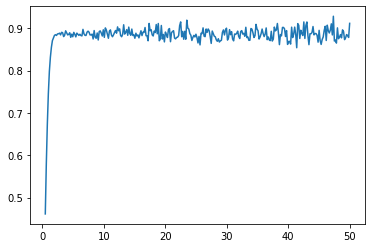

In [6]:
print("estimation de sqrt(pi)/2: ", gauss_estimate(10, 100000))

X_max = np.linspace(0.5, 50, 300)
est = [gauss_estimate(x_max, 100000) for x_max in X_max]

plt.plot(X_max, est)
plt.show()

On peut voir que les estimation avec une petite valeur maximal sont les plus stables.

#### Échantillonnage préférentiel (Importance sampling)

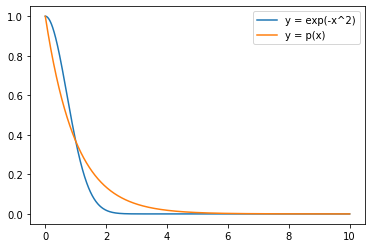

In [7]:
X = np.linspace(0, 10, 1000)

Gauss = np.exp(-X**2)
p = np.exp(-X)

plt.plot(X, Gauss, label="y = exp(-x^2)")
plt.plot(X, p, label="y = p(x)")
plt.legend()
plt.show()

On peut voir que la fonction p(x) est importante la ou exp(-x^2) est importante, mais qu'elle decroit ensuite plus doucement.

Elle est donc un PDF approprié pour calculer cette integrale.

In [8]:
def gauss_estimate_PDF(a, n_point):
    def p(x):
        return np.exp(-x*a)/a
    
    def f(x):
        return np.exp(-x**2)
    
    Xrand = np.random.exponential(a, n_point)
    Y = f(Xrand)
    P = p(Xrand)
    return (Y/P).sum()/n_point

estimation de sqrt(pi)/2:  0.881637046295521


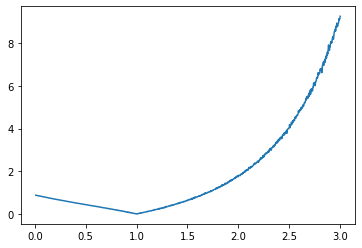

In [9]:
print("estimation de sqrt(pi)/2: ", gauss_estimate_PDF(1, 10000))

In = np.sqrt(np.pi)/2

a_list = np.linspace(0.01, 3, 1000)
err = [abs(In - gauss_estimate_PDF(a, 10000)) for a in a_list]

plt.plot(a_list, err)
plt.show()

On peut voir que cette methode optient une meilleur approximation avec moins de point.

Ce pendant on peut voir que l'erreur minimum est atteinte pour a=1, on a ensuite une erreur qui croit exponentiellement.

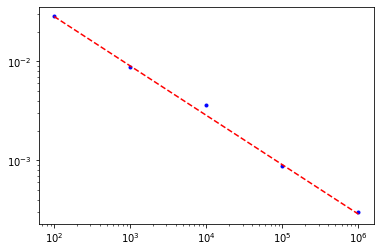

In [10]:
N = 10**np.arange(2, 7)
err = [np.mean([abs(In - gauss_estimate_PDF(1, n)) for _ in range(15)]) for n in N]

plt.plot(N, err, "b.")
plt.plot(N, err[0]/np.sqrt(N/N[0]), "r--")

plt.yscale("log")
plt.xscale("log")

plt.show()

On remarque que l'erreur evolue en $O(\frac{1}{\sqrt{N}}) $

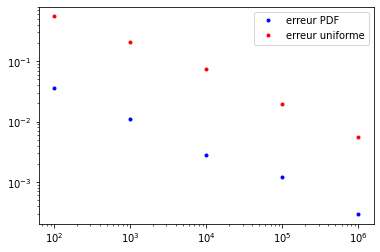

In [11]:
N = 10**np.arange(2, 7)
err_PDF = [np.mean([abs(In - gauss_estimate_PDF(1, n)) for _ in range(15)]) for n in N]
err_uni = [np.mean([abs(In - gauss_estimate(100, n)) for _ in range(15)]) for n in N]

plt.plot(N, err_PDF, "b.", label="erreur PDF")
plt.plot(N, err_uni, "r.", label="erreur uniforme")

plt.yscale("log")
plt.xscale("log")

plt.legend()

plt.show()

On remarque que les deux methode on la meme dependence en N, à un facteur multiplicatif prés. La methode des PDF est environ 15 fois plus precise pour n'importe quel N.

## Partie 2 :  Simulation Monte-Carlo

On ne peud pas calculer directement la foction de repartition car l'espace des phase est infini, mais aussi que meme par une methode d'integration numerique, l'integration sur un espace avec un grand nombre de dimmension est tres couteuse.

In [12]:
def make_ising_state(L) :
    """ It defines a LxL Ising state with spin +/ -1 uniformly distributed """
    S = 2* np.random.randint(2, size =(L,L)) - 1
    return S

def plot_conf(S) :
    """ Plot the Ising State """
    L = S.shape [0]
    X, Y = np.meshgrid(range (L) , range (L))
    plt.pcolormesh(X, Y, S, shading='auto')

On calcule l'energie avec des contion limite fermé. On le fait en multipliant S par S decalé d'un element vers le haut, et idem vers la droite.

energie =  4


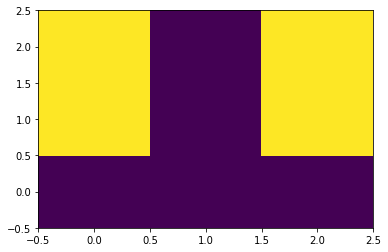

In [13]:
def energy_closed(S):
    return np.sum(S[:-1, :]*S[-1:, :]) + np.sum(S[:, :-1]*S[:, -1:])

s = make_ising_state(3)
plot_conf(s)
print("energie = ", energy_closed(s))

On fait maintenant le calcul pour les condition au limite bouclée.

On utilise la meme methode, mais on fait maintenant un decalage "bouclé".

energie =  -6


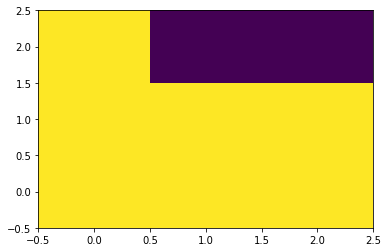

In [14]:
def energy_loop(S):
    round_swaped_x = np.concatenate((S[-1:, :], S[:-1, :]), axis=0)
    round_swaped_y = np.concatenate((S[:, -1:], S[:, :-1]), axis=1)
    
    return -np.sum(S*round_swaped_x + S*round_swaped_y)

s = make_ising_state(3)
plot_conf(s)
print("energie = ", energy_loop(s))

On definie maintenant une fonction aimentation:

In [15]:
def aimantation(S):
    return np.sum(S)

On peut aussi calculer toute les valeur possible de l'exponetiel de la variation d'energie:

In [16]:
def make_list(T):
    deltaE = -2*np.array([2, 4])
    return np.exp(deltaE/T)

Puis une fonction qui calcule la variation d'enrgie lorsque l'on flip le spin (i, j) de S.

In [17]:
def variation_energie_flip(S, i, j):
    i_m = (i - 1) % S.shape[0]
    i_p = (i + 1) % S.shape[0]
    
    j_m = (j - 1) % S.shape[1]
    j_p = (j + 1) % S.shape[1]
    
    return 2*S[i, j]*(S[i_m, j] + S[i_p, j] + S[i, j_m] + S[i, j_p])

On ecrit ensuite une fonction qui calcule l'exponetiel de 1/T fois la variation d'enrgie lorsque l'on flip le spin (i, j) de S, et qui retourne aussi cette enrgie pour ensuite incrementer l'energie.

In [18]:
def exp_variation_energy_flip(S, i, j, List):
    deltaE = variation_energie_flip(S, i, j)
    if deltaE <= 0:
        return deltaE, 1
    return deltaE, List[deltaE//4 - 1]

On ecris la fonction d'iteration de la methode de Monte-Carlo/Metropolis.

Pour eviter de re-calculer l'aimantation et l'energie, on retourne aussi la variation d'energie et d'aimantation effective (0 si on ne flip pas le bit).

In [19]:
def mc_move_single(S, List) :
    i, j = np.random.randint(S.shape[0]), np.random.randint(S.shape[1])
    deltaE, exp_deltaE = exp_variation_energy_flip(S, i, j, List)
    if exp_deltaE == 1:
        S[i, j] *= -1
        return deltaE, 2*S[i, j]
    elif exp_deltaE >= np.random.uniform(0, 1):
        S[i, j] *= -1
        return deltaE, 2*S[i, j]
    return 0, 0

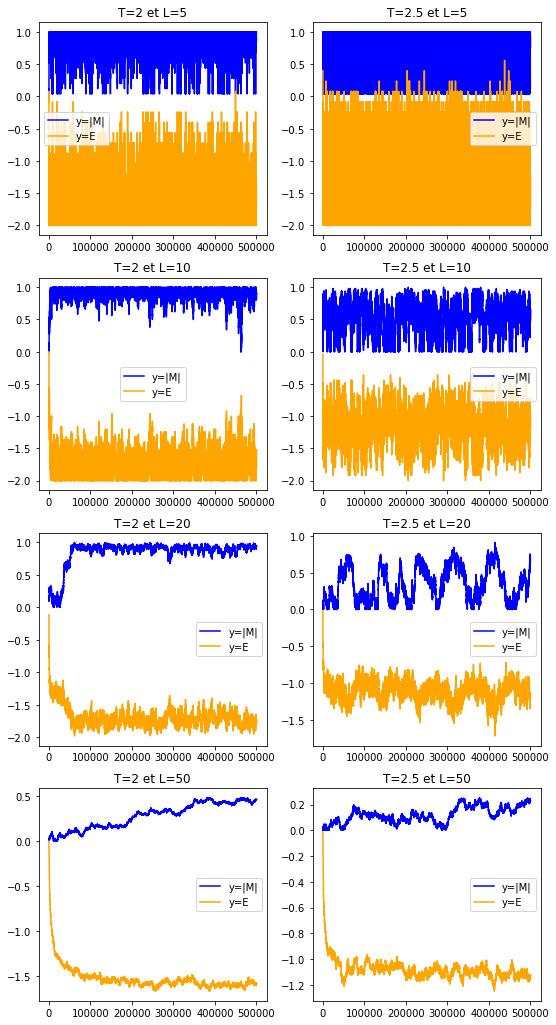

In [20]:
def Plot(T, L):
    List = make_list(T)
    s = make_ising_state(L)
    M, E = [aimantation(s)], [energy_loop(s)]

    for _ in range(500000):
        deltaE, deltaM = mc_move_single(s, List)
        M.append(M[-1] + deltaM) #on ajoute la difference de magnetisation
        E.append(E[-1] + deltaE) #et d'energie

    plt.plot(np.absolute(np.array(M))/(L*L), color='b', label="y=|M|")
    plt.plot(np.array(E)/(L*L), color='orange', label="y=E")

    plt.legend()
    plt.title(f"T={T} et L={L}")

plt.figure(figsize=(9, 18))
plt.subplot(4, 2, 1)
Plot(2, 5)

plt.subplot(4, 2, 2)
Plot(2.5, 5)

plt.subplot(4, 2, 3)
Plot(2, 10)

plt.subplot(4, 2, 4)
Plot(2.5, 10)

plt.subplot(4, 2, 5)
Plot(2, 20)

plt.subplot(4, 2, 6)
Plot(2.5, 20)

plt.subplot(4, 2, 7)
Plot(2, 50)

plt.subplot(4, 2, 8)
Plot(2.5, 50)

On peut voir que des systeme avec plus de dipoles atteignent des energie plus basse et avec moins de fluctuations.

De plus ces fluctuations d'energie et d'aimantation augmente avec la temperature.

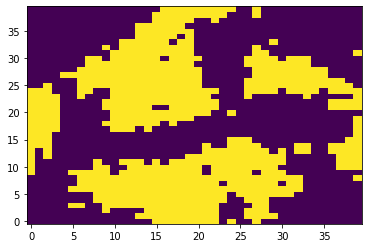

In [21]:
s = make_ising_state(40)

for _ in range(50000):
    mc_move_single(s, make_list(2))

plot_conf(s)

On a ici un etat qui est dominé par l'energie: des "domaine" se créent avec un grand nombre de spin identique.

On peut redefinir la fonction $ mc\_move\_single(S, T) $ en $ mc\_move(S, T, nt) $ qui applique $ mc\_move\_single(S, T) $ $ nt $ PMC fois.

apres 1000 PMC l'energie par spin vaut  -1.0225
et l'aimantation par spin vaut  0.0175


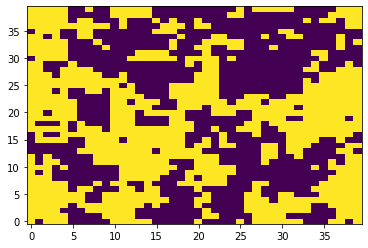

In [22]:
def mc_move(S, List, nt):
    PMC = np.prod(S.shape)
    for _ in range(nt * PMC):
        mc_move_single(S, List)

L = 40
s = make_ising_state(L)
mc_move(s, make_list(2.5), 1000)

print("apres 1000 PMC l'energie par spin vaut ", energy_loop(s)/(L*L))
print("et l'aimantation par spin vaut ", aimantation(s)/(L*L))
plot_conf(s)

On definit maintenant une fonction qui retourne E et M moyen sur 1000 PMC apres 3000 PMC

In [23]:
def E_M_moyen(S, T):
    List = make_list(T)
    #print("caclul de E et M moyen pour T=", T) #pour connaitre l'evolution du calcul
    
    mc_move(S, List, 3000) #on fait les 4000 premiere iterations
    E, M = energy_loop(S), aimantation(S) #on calcul l'energie
    E0, M0 = 0, 0
    
    PMC = np.prod(S.shape)
    max_it = 800 * PMC
    for i in range(max_it):
            deltaE, deltaM = mc_move_single(S, List)
            E0 += (max_it - i)*deltaE #on ajoute la difference de magnetisation
            M0 += (max_it - i)*deltaM #et d'energie
    
    E = (max_it*E + E0)/PMC/max_it
    M = (max_it*M + M0)/PMC/max_it
    
    #print(f"E={ E }, M= { M }\n")
    return E, M

Et une fonction qui trace E et M en fonction de T pour un L donné.

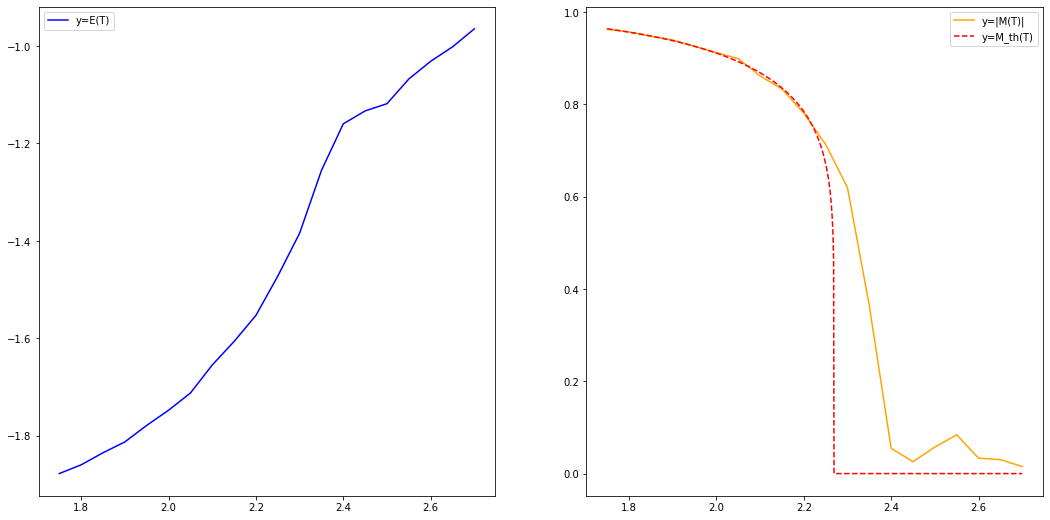

In [24]:
def formule_analytique(T):
    sh = 1 - np.sinh(2/T)**-4
    sh *= sh > 0 #pour eviter les racine negative
    return sh**(1/8)

def Plot_E_M(L, T_min, T_max, n):
    T = np.linspace(T_min, T_max, n)
    E_M = np.array([[*E_M_moyen(make_ising_state(L), t)] for t in T])
    
    plt.figure(figsize=(18, 9))
    
    plt.subplot(1, 2, 1)
    plt.plot(T, E_M[:, 0], color='b', label="y=E(T)")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(T, np.absolute(E_M[:, 1]), color='orange', label="y=|M(T)|")
    
    T_plot = np.linspace(T_min, T_max, 1000)
    plt.plot(T_plot, formule_analytique(T_plot), "r--", label="y=M_th(T)")
    plt.legend()

Plot_E_M(30, 1.75, 2.7, 20)
plt.show()

On observe bien une forme de l'aimantation qui suit la solution analityque. On observe cependant quelque saut autour de la temperature critique, qui sont du à la taille trop faible de notre systeme.

La forme de l'energie est coherente, plus la temperature est basse plus l'energie tend vers l'energie fondamentale. On observe aussi une coupure de pente au niveau de la temperature critique, qui correspond au changement de regime (regime dominé par l'energie à basse temperature, et dominé par l'entropie à haute temperature).